# **Telco Customer Churn Prediction**
### İmport Libraries
### Load Data
### Missin Values
### Data Analiysis(EDA and Visualization)
### Feature Engineerin
### Outlier Analysis
### Label Encoder-One Hot Encoder
### Base Models
### CatBoost Model
### LightGMB Model
### GBM Model

# Import Libraries

In [1]:
# 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# İgnore the Warnings
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_columns', None)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


# Load Data

In [2]:
# Load data 
df=pd.read_csv("../input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df1=df.copy() # copies data as df1
df2=df.copy()

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# Convert TotalCharges's dtype to float from string 
df["TotalCharges"]=df["TotalCharges"].apply(lambda x: float(x) if len(x)>1 else np.nan) # "if len(x)>1" because df["TotalCharges"] has '' 

## Missing Values

In [6]:
# Missin Values
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
# NaN Total Charges : İf tenure = 0 then Total Charges = 0
df.loc[df["TotalCharges"].isna(),["tenure","MonthlyCharges", "TotalCharges"]]

,tenure,MonthlyCharges,TotalCharges
488,0,52.55,NaN
753,0,20.25,NaN
936,0,80.85,NaN
1082,0,25.75,NaN
1340,0,56.05,NaN
3331,0,19.85,NaN
3826,0,25.35,NaN
4380,0,20.00,NaN
5218,0,19.70,NaN
6670,0,73.35,NaN


In [8]:
# Fiil Total Chargres with 0
df["TotalCharges"].fillna(0,inplace=True)

In [9]:
# Missin Value Control
df.isna().sum().sum()

0

# Data Analysis (EDA + Visualization)

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.85,118.75
TotalCharges,7043.0,2279.734304,2266.794470,0.00,398.55,1394.55,3786.60,8684.80


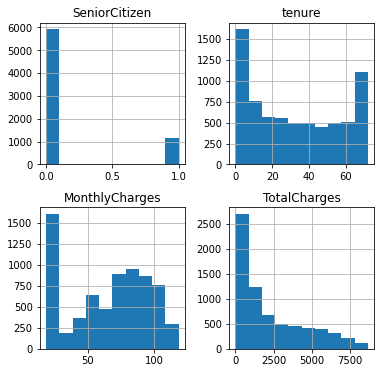

In [11]:
df.hist(figsize=(6,6));

In [12]:
# Churn count
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

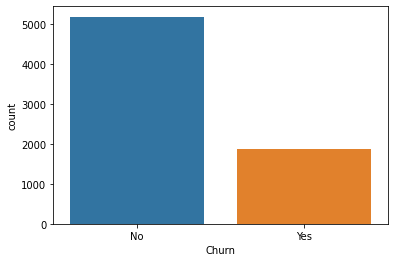

In [13]:
sns.countplot("Churn", data=df);

In [14]:
# Grab categerocal and numerical columns
cat_cols=[col for col in df.columns if df[col].nunique()<10 ]
num_cols=[col for col in df.columns if col not in cat_cols and df[col].dtype!="O"]
print("# of cat cols:", len(cat_cols) ," and # of numcols: ", len(num_cols))

# of cat cols: 17  and # of numcols:  3


### Categorical Variables

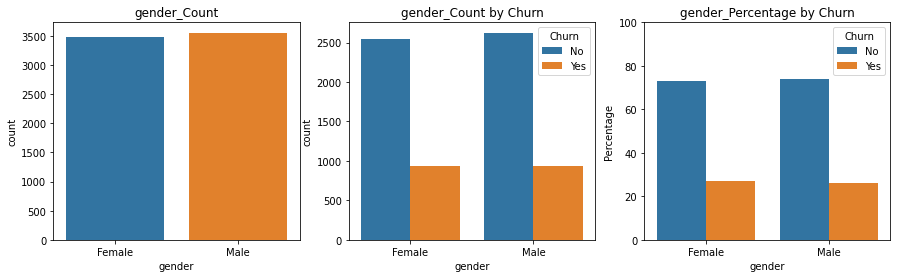

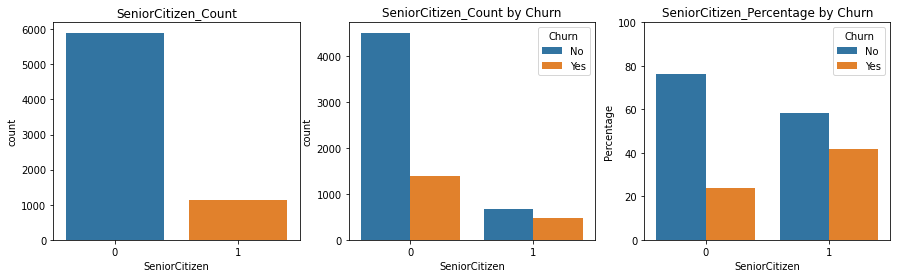

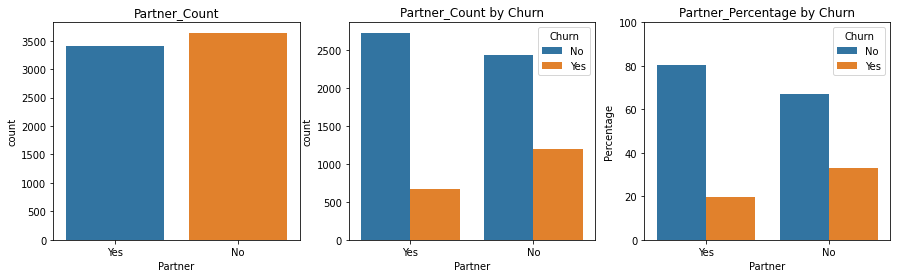

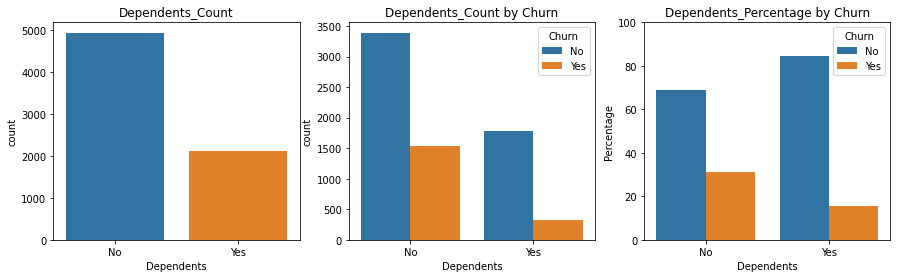

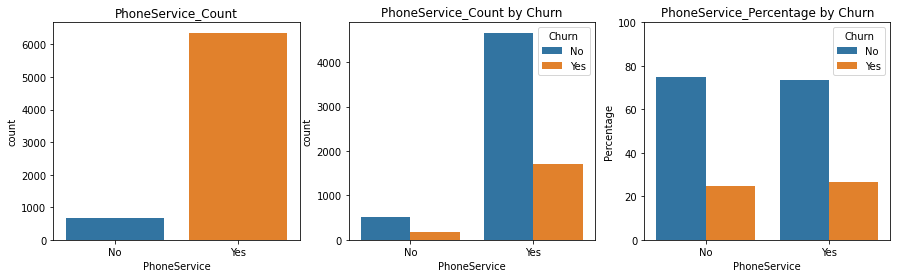

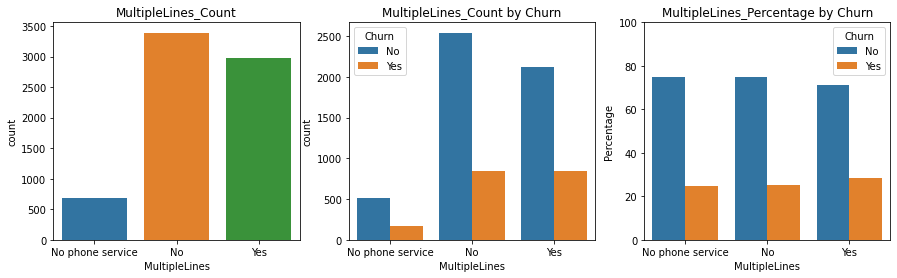

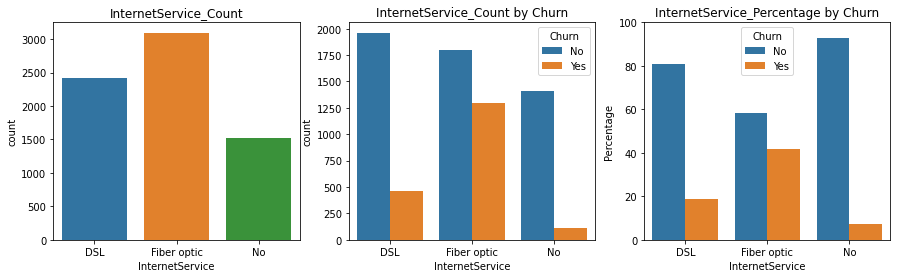

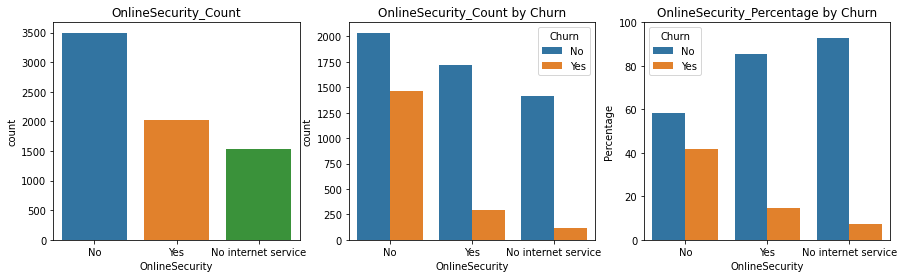

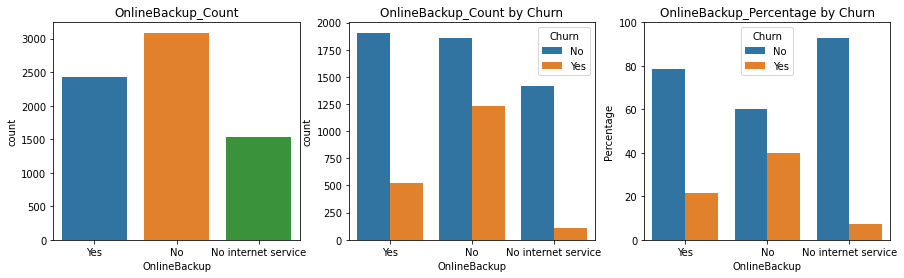

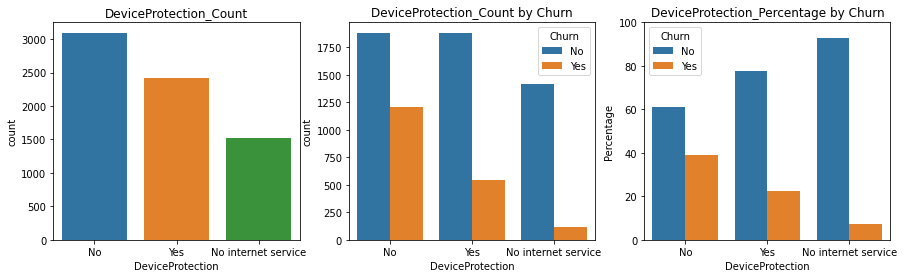

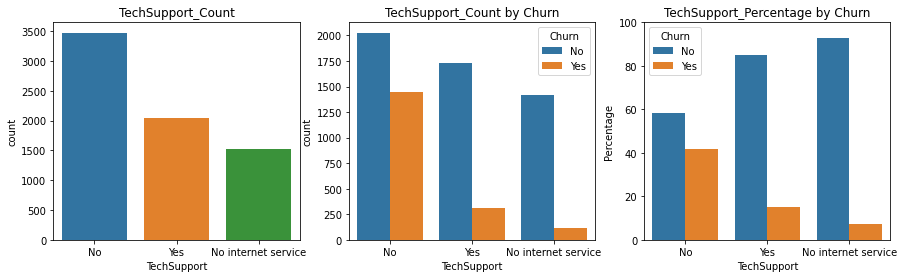

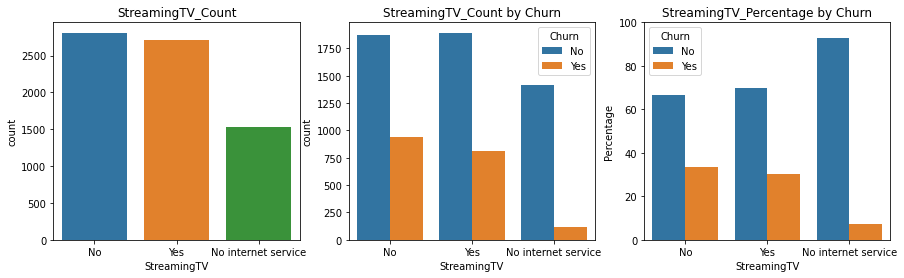

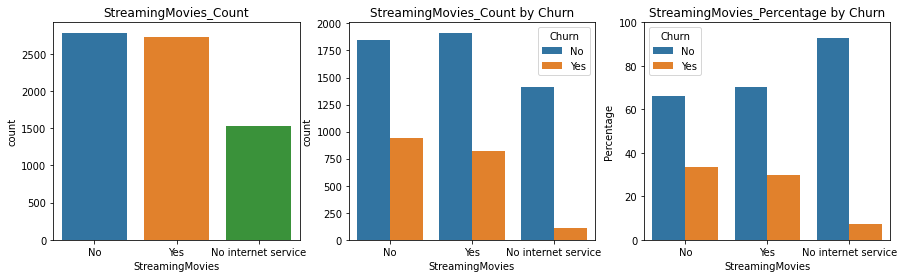

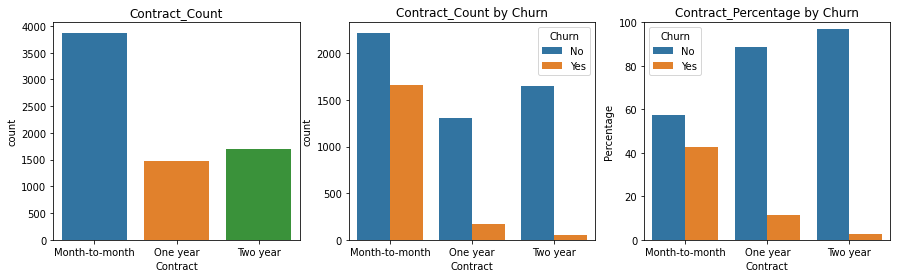

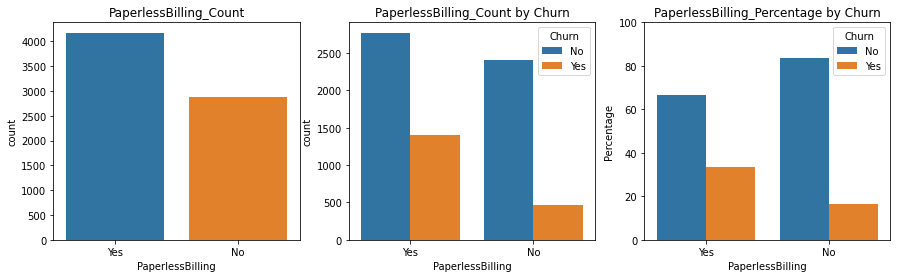

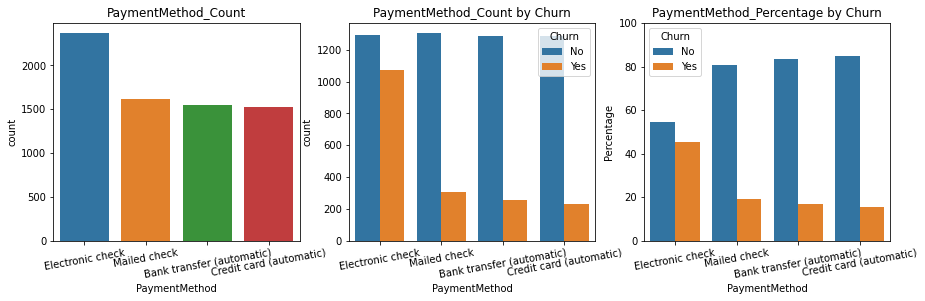

In [15]:
# Plot catagorical columns by Churn columns
plot_col=[col for col in cat_cols if col!="Churn"]
for col in plot_col:
    fig, ax=plt.subplots(1,3,figsize=(15,4))
    data1=(df.groupby(col)["Churn"].value_counts(normalize=True)*100).rename("Percentage").reset_index()
   
    sns.countplot(ax=ax[0],x=col, data=df)
    ax[0].set_title(col+"_Count")
   
    sns.countplot(ax=ax[1],x=col, data=df, hue="Churn")
    ax[1].set_title(col+"_Count by Churn")
    
    sns.barplot(ax=ax[2],x=col, y="Percentage", data=data1, hue="Churn",order=df[col].unique())
    ax[2].set_ylim(0,100)
    ax[2].set_title(col+"_Percentage by Churn")

    if col =="PaymentMethod":
          for i in range(3):
            ax[i].tick_params(axis="x",labelrotation=10)

### Numerical Variaibles

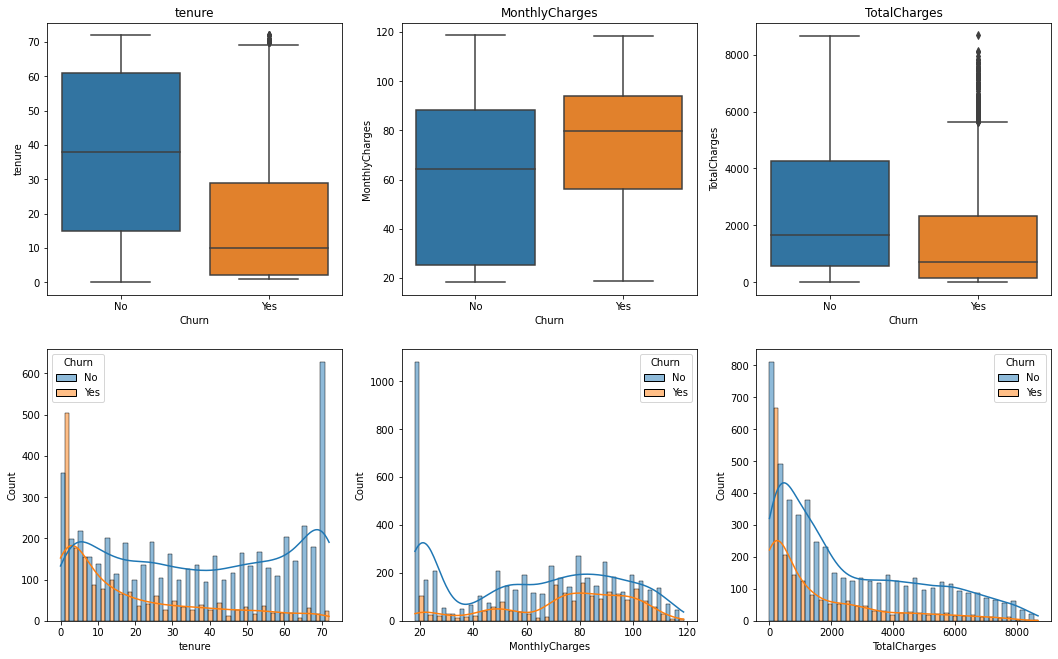

In [16]:
#Distibution of Numeracail Columns by Churn
fig, ax=plt.subplots(2,3,figsize=(18,11))
for i,col in enumerate(num_cols):
    sns.boxplot(ax=ax[0,i],x="Churn",y=col, data=df);
    ax[0,i].set_title(col)
    sns.histplot(ax=ax[1,i],x=df[col],hue=df["Churn"],multiple="dodge",kde=True,bins=30)


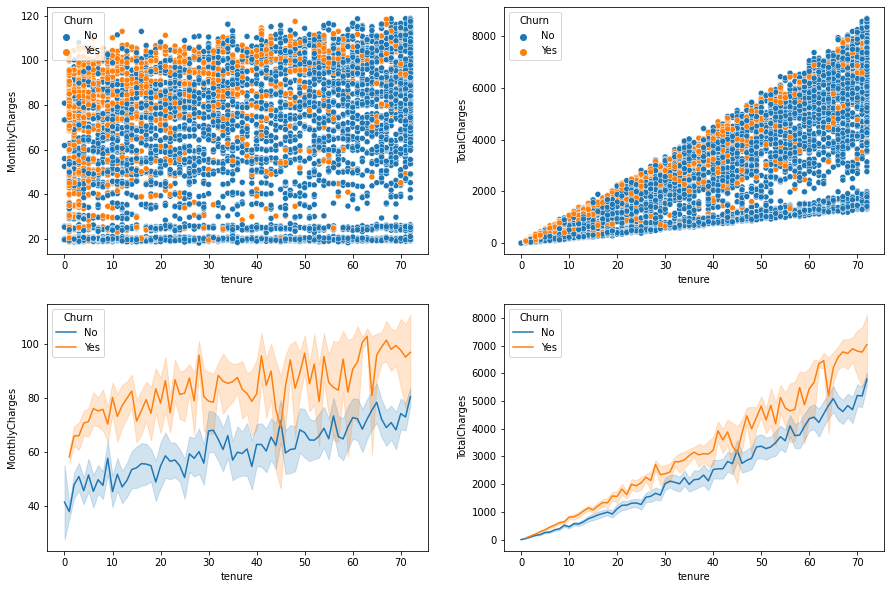

In [17]:
# Numerical Columns visualization
fig , ax=plt.subplots(2,2, figsize=(15,10))
for i,col in enumerate(["MonthlyCharges","TotalCharges"]):
    sns.scatterplot(ax=ax[0,i],x="tenure", y=col,data=df,hue="Churn")
    #sns.scatterplot(ax=ax[1,i],x="tenure", y=col,data=df,hue="Churn")
    sns.lineplot(ax=ax[1,i],x="tenure", y=col,data=df,hue="Churn")

<AxesSubplot:>

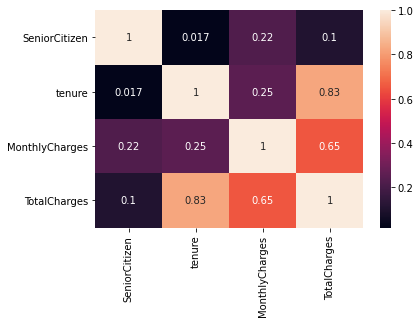

In [18]:
#Corelation 
sns.heatmap(df.corr(),annot=True)

## Feature Engineerin

In [19]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### New Features from customerID

In [20]:

# 7795-CFOCW---->nnnn-ssss 

# Before "-" in ID
df["ID_Fig1"]=df.customerID.apply(lambda x: int(x[0]))
df["ID_Fig2"]=df.customerID.apply(lambda x: int(x[1]))
df["ID_Fig3"]=df.customerID.apply(lambda x: int(x[2]))
df["ID_Fig4"]=df.customerID.apply(lambda x: int(x[3]))

# After "-" in ID
## Letter List
letter = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
### Give the Letter Number 
df["ID_Let1"]=df.customerID.apply(lambda x: letter.index(x[5])) # index number of the letter
df["ID_Let2"]=df.customerID.apply(lambda x: letter.index(x[6]))
df["ID_Let3"]=df.customerID.apply(lambda x: letter.index(x[7]))
df["ID_Let4"]=df.customerID.apply(lambda x: letter.index(x[8]))

<AxesSubplot:xlabel='ID_Let4', ylabel='count'>

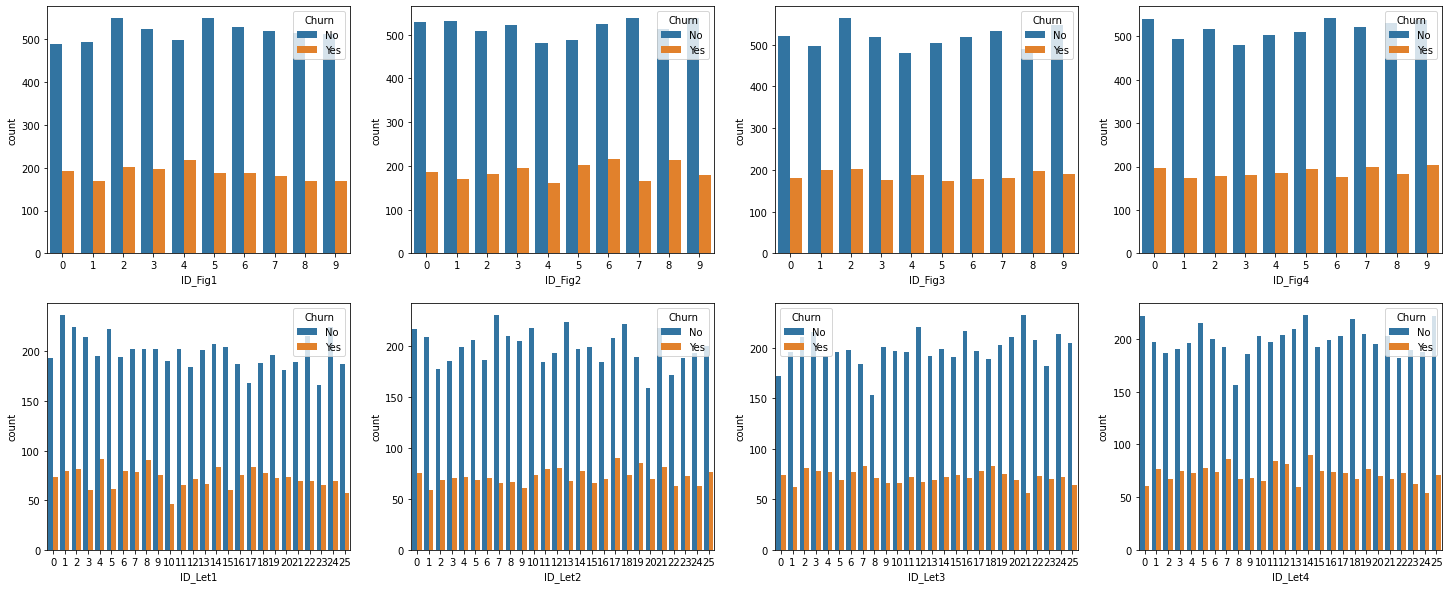

In [21]:
# Is there any relation between Chunr and these new features, Lets look at the plots
fig,ax=plt.subplots(2,4, figsize=(25,10))

sns.countplot(ax=ax[0,0],x=df.ID_Fig1, hue=df.Churn)
sns.countplot(ax=ax[0,1],x=df.ID_Fig2, hue=df.Churn)
sns.countplot(ax=ax[0,2],x=df.ID_Fig3, hue=df.Churn)
sns.countplot(ax=ax[0,3],x=df.ID_Fig4, hue=df.Churn)

sns.countplot(ax=ax[1,0],x=df.ID_Let1, hue=df.Churn)
sns.countplot(ax=ax[1,1],x=df.ID_Let2, hue=df.Churn)
sns.countplot(ax=ax[1,2],x=df.ID_Let3, hue=df.Churn)
sns.countplot(ax=ax[1,3],x=df.ID_Let4, hue=df.Churn)



### New Feature(MonthlyCharges/Tenure and TotalCharges/Tenure)


In [22]:
# MonthlyCharges/Tenure and TotalCharges/Tenure
#New_MCharg_Tenure
df["New_MCharg_Tenure"]=df.MonthlyCharges/(df.tenure)

#New_TCharg_Tenure
df["New_TCharg_Tenure"]=df.TotalCharges/(df.tenure)
df["New_TCharg_Tenure"].fillna(0,inplace=True)


<AxesSubplot:xlabel='Churn', ylabel='New_TCharg_Tenure'>

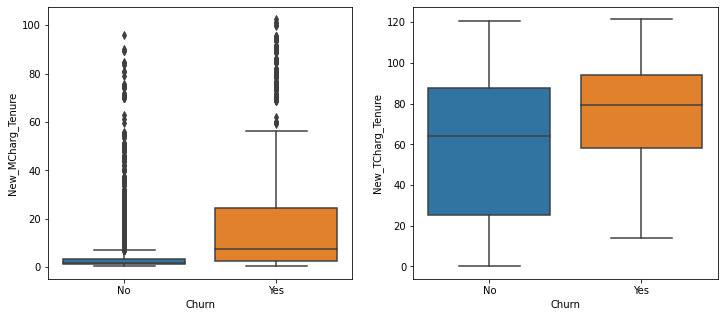

In [23]:
#EXCELLENT, boxplot shows that New_MCharg_Tenure feature is excelent, I think it's very important
fig, ax=plt.subplots(1,2,figsize=(12,5))
sns.boxplot(ax=ax[0],y=df["New_MCharg_Tenure"], x=df.Churn)
sns.boxplot(ax=ax[1],y=df["New_TCharg_Tenure"], x=df.Churn)

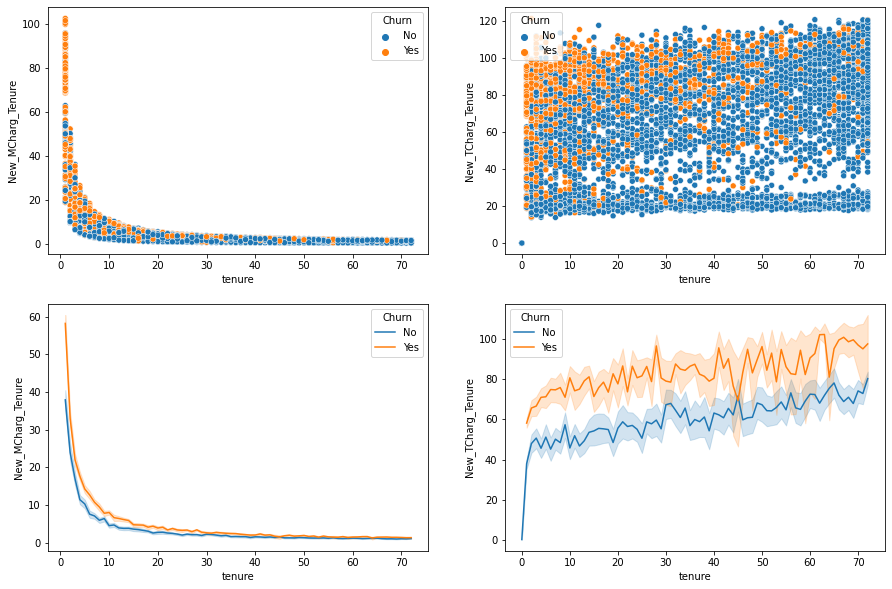

In [24]:
fig , ax=plt.subplots(2,2, figsize=(15,10))
for i,col in enumerate(["New_MCharg_Tenure","New_TCharg_Tenure"]):
    sns.scatterplot(ax=ax[0,i],x="tenure", y=col,data=df,hue="Churn")
    #sns.scatterplot(ax=ax[1,i],x="tenure", y=col,data=df,hue="Churn")
    sns.lineplot(ax=ax[1,i],x="tenure", y=col,data=df,hue="Churn")

## Outlier Analysis

In [25]:
# This function equates otuliers of numeric columns and returns these values in the table.
# Also plots boxplots
#And shows observations of otulier columns that are autlier
def outliers_view(df,num_treshould = 20, q1=0.25,q3=0.75,visul = False):
    num_cols = [x for x in df.columns if (df[x].dtype != "O") & (df[x].nunique() > num_treshould)]
    table = pd.DataFrame()
    outliers_dict = {}
    if visul ==True:
        for i in num_cols:
            sns.boxplot(y=df[i])
            plt.xlabel(i)
            plt.show()

    for i in range(len(num_cols)):
        q_1 = df[num_cols[i]].quantile(q1)
        q2 = df[num_cols[i]].quantile(0.5)
        q_3 = df[num_cols[i]].quantile(q3)
        iqr = q_3 - q_1
        up = q_3 + 1.5 * iqr
        low = q_1 - 1.5*iqr
        outliers_count = len(df[(df[num_cols[i]] < low) | (df[num_cols[i]] > up)][num_cols[i]])

        table.loc[num_cols[i],"low_limit"] = low
        table.loc[num_cols[i], q1] = q_1
        table.loc[num_cols[i], "mean"] = df[num_cols[i]].mean()
        table.loc[num_cols[i], "median"] = q2
        table.loc[num_cols[i], q3] = q_3
        table.loc[num_cols[i], "up_limit"] = up
        table.loc[num_cols[i], "count"] = outliers_count
        table.loc[num_cols[i], "percent"] = outliers_count/df.shape[0]*100
        outliers_dict[num_cols[i]] = df[(df[num_cols[i]] < low) | (df[num_cols[i]] > up)][num_cols[i]]
    outliers_values =pd.DataFrame.from_dict(outliers_dict)
    outliers_values = outliers_values[[col for col in outliers_values.columns if outliers_values[col].notnull().sum() != 0]]

    return table, outliers_values

# Replace outliers with treshoulds
def outlier_press( dataframe, column=all,num_treshould=20,q1=0.25,q3=0.75):
    if column == all:
        columns =outliers_view(dataframe,num_treshould=num_treshould,q1=q1,q3=q3)[1].columns
    else:
        columns = column

    for col in columns:
        indexes = outliers_view(dataframe,num_treshould=num_treshould,q1=q1,q3=q3)[1][col]\
            [outliers_view(dataframe,num_treshould=num_treshould,q1=q1,q3=q3)[1][col].notnull()].index
        low_limit = outliers_view(dataframe,num_treshould=num_treshould,q1=q1,q3=q3)[0].loc[col, "low_limit"]
        up_limit = outliers_view(dataframe,num_treshould=num_treshould,q1=q1,q3=q3)[0].loc[col, "up_limit"]
        dataframe.loc[indexes, col] = dataframe.loc[indexes, col].\
            apply(lambda x: low_limit if x < low_limit else up_limit)
    df1=dataframe
    return df1

In [26]:
outliers_view(df,q3=0.95)

(                     low_limit        0.25         mean   median         0.95  \
 tenure              -85.500000    9.000000    32.371149    29.00    72.000000   
 MonthlyCharges      -72.350000   35.500000    64.761692    70.35   107.400000   
 TotalCharges      -9385.162500  398.550000  2279.734304  1394.55  6921.025000   
 ID_Let1             -21.000000    6.000000    12.225756    12.00    24.000000   
 ID_Let2             -21.000000    6.000000    12.445833    12.00    24.000000   
 ID_Let3             -21.000000    6.000000    12.598609    13.00    24.000000   
 ID_Let4             -21.000000    6.000000    12.481187    13.00    24.000000   
 New_MCharg_Tenure   -65.729766    1.278093          inf     2.15    45.950000   
 New_TCharg_Tenure   -72.692578   35.649000    64.698218    70.30   107.876719   
 
                        up_limit  count   percent  
 tenure               166.500000    0.0  0.000000  
 MonthlyCharges       215.250000    0.0  0.000000  
 TotalCharges       16

In [27]:
df=outlier_press(df,["New_MCharg_Tenure"],q3=0.90)

### Numerical New Columns visualization

<AxesSubplot:xlabel='New_MCharg_Tenure', ylabel='Count'>

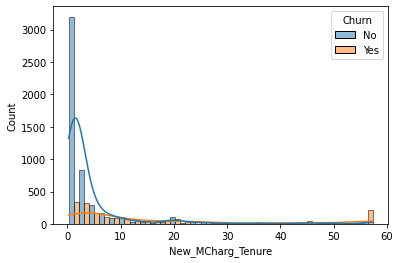

In [28]:
# New_MCharg_Tenure
sns.histplot(x=df["New_MCharg_Tenure"],hue=df["Churn"],multiple="dodge",kde=True,bins=30)


<AxesSubplot:xlabel='New_TCharg_Tenure', ylabel='Count'>

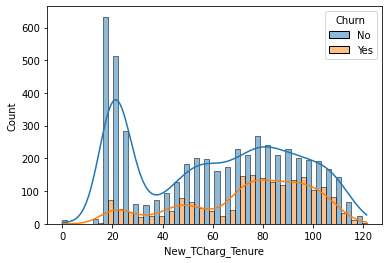

In [29]:
# New_TCharg_Tenure
sns.histplot(x=df["New_TCharg_Tenure"],hue=df["Churn"],multiple="dodge",kde=True,bins=30)


## Label Encoder-One Hot Encoder

In [30]:
# LABEL ENCODER AND ONE HOT ENCODDER Functions

from sklearn import preprocessing
# Label Encoder
def label_encoder(dataframe, binary_cols):
    for col in binary_cols:
        labelencoder = preprocessing.LabelEncoder()
        dataframe[col] = labelencoder.fit_transform(dataframe[col])
    return dataframe


#One Hot Encoder
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [31]:
# Grab binary columns and Categorical but not binary columns 
binary_cols=[col for col in cat_cols if df[col].nunique()==2]
notbinary_cat_cols=[col for col in cat_cols if col not in binary_cols]

In [32]:
# Label Encoder
label_encoder(df,binary_cols)

# Onde Hot Encoder
df=one_hot_encoder(df,notbinary_cat_cols)

In [33]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,ID_Fig1,ID_Fig2,ID_Fig3,ID_Fig4,ID_Let1,ID_Let2,ID_Let3,ID_Let4,New_MCharg_Tenure,New_TCharg_Tenure,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,0,7,5,9,0,21,7,21,4,29.850,29.850000,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.50,0,5,5,7,5,6,13,21,3,1.675,55.573529,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,1,0,0,0,2,1,1,53.85,108.15,1,3,6,6,8,16,15,24,1,26.925,54.075000,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
3,7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,0,7,7,9,5,2,5,14,2,0.940,40.905556,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0
4,9237-HQITU,0,0,0,0,2,1,1,70.70,151.65,1,9,2,3,7,7,16,8,19,35.350,75.825000,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0


## Standar Scaler

In [34]:
#scaler_cols=[col for col  in df.columns if (df[col].dtype!="O") & (df[col].nunique()>5)]

In [35]:
"""from sklearn.preprocessing import StandardScaler
for col in scaler_cols:
    scaler = StandardScaler().fit(df[[col]])
    df[col]=scaler.transform(df[[col]])"""

'from sklearn.preprocessing import StandardScaler\nfor col in scaler_cols:\n    scaler = StandardScaler().fit(df[[col]])\n    df[col]=scaler.transform(df[[col]])'

# Model

In [36]:
# İmport Libraries
from sklearn import preprocessing, metrics
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score

# İmport All Base Models
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# Model Evaluation metrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, recall_score



In [48]:
# Train-Test Split
y=df["Churn"]
x=df.drop(["customerID","Churn"],axis=1) #Drop customerID
X_train,X_test,y_train,y_test= train_test_split(x,y,test_size=0.20)

## Base Models

In [45]:
# Base Models Things
models = [('KNN', KNeighborsClassifier()),
          ('CART', DecisionTreeClassifier()),
          ('RF', RandomForestClassifier()),
          ('GBM', GradientBoostingClassifier()),
          ("XGBoost", XGBClassifier()),
          ("LightGBM", LGBMClassifier()),
          ("CatBoost", CatBoostClassifier(verbose=False)),
          ("LOG",LogisticRegression()),
          ("SVC",SVC())]


In [49]:
# Base Model Scores
test_scor=[]
train_scor=[]
name1=[]
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    test_score=accuracy_score(y_pred, y_test) 
    y_pred_train=model.predict(X_train)
    train_score=accuracy_score(y_pred_train, y_train)
    name1.append(name)
    test_scor.append(test_score)
    train_scor.append(train_score)
    
base_model_score=pd.DataFrame({"indeks":name1,"Test_Scor":test_scor,"Train_Scor":train_scor})
#base_model_score.index=name
base_model_score.set_index("indeks")

[07:30:24] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Test_Scor,Train_Scor
indeks,,
KNN,0.764372,0.833156
CART,0.740951,1.000000
RF,0.814053,1.000000
GBM,0.818311,0.834398
XGBoost,0.790632,0.996983
LightGBM,0.806246,0.937345
CatBoost,0.808375,0.929180
LOG,0.815472,0.798367
SVC,0.739532,0.733404


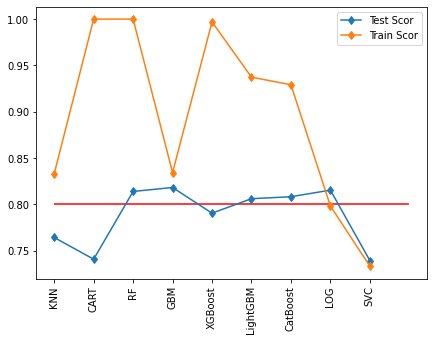

In [52]:
fig, ax=plt.subplots(figsize=(7,5))
ax.plot(base_model_score.indeks, base_model_score.Test_Scor, label="Test Scor",marker="d")
ax.plot(base_model_score.indeks, base_model_score.Train_Scor,label="Train Scor", marker="d")
plt.legend()
plt.hlines(0.80,0,9,colors="red")
plt.xticks(rotation=90);

In [53]:
#######################################
# Feature Importance
#######################################

def plot_importance(model, X, num=x.shape[0]):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': X.columns})
    plt.figure(figsize=(10, 15))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Feature Importance')
    plt.tight_layout()
    plt.savefig('importances-01.png')
    plt.show()

# **Importanta 5 metrics: Accuracy, precision, recall, f1-score  and ROC Curve**

# CatBoost, LightGBM and GBM Models

## CatBoost Model

In [54]:
# CatBoostClassifier()
model= CatBoostClassifier(verbose=False).fit(X_train, y_train)
y_pred = model.predict(X_test)
test_score=accuracy_score(y_pred, y_test) 
y_pred_train=model.predict(X_train)
train_score=accuracy_score(y_pred_train, y_train)

print("Test Scor: ",test_score)
print("Train Score", train_score)
print("###########################")
print(confusion_matrix(y_pred, y_test))
print(classification_report(y_pred, y_test))

Test Scor:  0.808374733853797
Train Score 0.9291799787007454
###########################
[[950 178]
 [ 92 189]]
              precision    recall  f1-score   support

           0       0.91      0.84      0.88      1128
           1       0.51      0.67      0.58       281

    accuracy                           0.81      1409
   macro avg       0.71      0.76      0.73      1409
weighted avg       0.83      0.81      0.82      1409



In [55]:
# Model Tuning

catb_params = {"iterations": [200, 500, 800,1000],
               "learning_rate": [0.001, 0.01, 0.1],
               "depth": [1 ,2, 3, 5, 6]}

catb_model =CatBoostClassifier(verbose=False)
catb_cv_model = GridSearchCV(catb_model,
                             catb_params,
                             cv=5,
                             n_jobs=-1,
                             verbose=2).fit(X_train, y_train)

catb_cv_model.best_params_

Fitting 5 folds for each of 60 candidates, totalling 300 fits


{'depth': 2, 'iterations': 500, 'learning_rate': 0.01}

In [56]:
# Final Model

catb_tuned = CatBoostClassifier(**catb_cv_model.best_params_,verbose=False).fit(X_train, y_train)
y_pred = catb_tuned.predict(X_test)
test_score=accuracy_score(y_pred, y_test) 
y_pred_train=catb_tuned.predict(X_train)
train_score=accuracy_score(y_pred_train, y_train)

print("Test Scor: ",test_score)
print("Train Score", train_score)
print(confusion_matrix(y_pred, y_test))
print(classification_report(y_pred, y_test))

Test Scor:  0.8133427963094393
Train Score 0.8058217962371317
[[969 190]
 [ 73 177]]
              precision    recall  f1-score   support

           0       0.93      0.84      0.88      1159
           1       0.48      0.71      0.57       250

    accuracy                           0.81      1409
   macro avg       0.71      0.77      0.73      1409
weighted avg       0.85      0.81      0.83      1409



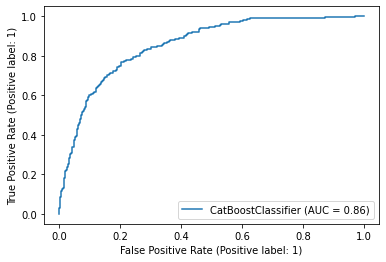

In [57]:
# Roc Curve
metrics.plot_roc_curve(catb_tuned, X_test, y_test)  

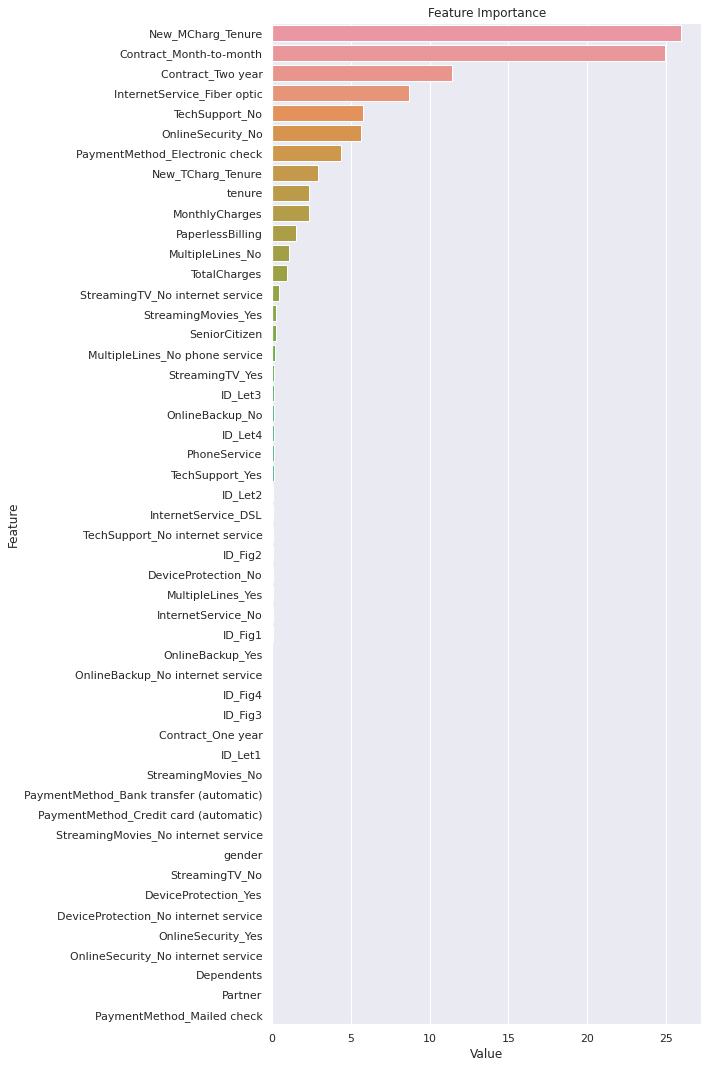

In [58]:
# Plot İmportance
plot_importance(catb_tuned , X_test)

## Ligth GBM Model

In [59]:
# LGBMClassifier()
model= LGBMClassifier().fit(X_train, y_train)
y_pred = model.predict(X_test)
test_score=accuracy_score(y_pred, y_test) 
y_pred_train=model.predict(X_train)
train_score=accuracy_score(y_pred_train, y_train)

print("Test Scor: ",test_score)
print("Train Score", train_score)
print("###########################")
print(confusion_matrix(y_pred, y_test))
print(classification_report(y_pred, y_test))

Test Scor:  0.8062455642299503
Train Score 0.9373446929357473
###########################
[[942 173]
 [100 194]]
              precision    recall  f1-score   support

           0       0.90      0.84      0.87      1115
           1       0.53      0.66      0.59       294

    accuracy                           0.81      1409
   macro avg       0.72      0.75      0.73      1409
weighted avg       0.83      0.81      0.81      1409



In [60]:
# Model Tuning

lgb_model = LGBMClassifier()

lgbm_params = {"learning_rate": [0.005,0.01, 0.1],
               "n_estimators": [300, 500, 1000],
               "max_depth": [2, 3, 5, 8],
               "colsample_bytree": [1,0.9, 0.8, 0.6,0.5]}

lgbm_cv_model = GridSearchCV(lgb_model,
                             lgbm_params,
                             cv=10,
                             n_jobs=-1,
                             verbose=2).fit(X_train, y_train)

lgbm_cv_model.best_params_

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


{'colsample_bytree': 0.8,
 'learning_rate': 0.01,
 'max_depth': 3,
 'n_estimators': 500}

In [61]:
# Final Model

lgbm_tuned = LGBMClassifier(**lgbm_cv_model.best_params_).fit(X_train, y_train)
y_pred = lgbm_tuned.predict(X_test)
test_score=accuracy_score(y_pred, y_test) 
y_pred_train=lgbm_tuned.predict(X_train)
train_score=accuracy_score(y_pred_train, y_train)

print("Test Scor: ",test_score)
print("Train Score", train_score)
print("###########################")
print(confusion_matrix(y_pred, y_test))
print(classification_report(y_pred, y_test))

Test Scor:  0.8218594748048261
Train Score 0.8157614483493077
###########################
[[971 180]
 [ 71 187]]
              precision    recall  f1-score   support

           0       0.93      0.84      0.89      1151
           1       0.51      0.72      0.60       258

    accuracy                           0.82      1409
   macro avg       0.72      0.78      0.74      1409
weighted avg       0.85      0.82      0.83      1409



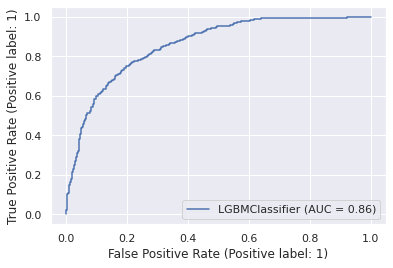

In [62]:
# Roc Curve
metrics.plot_roc_curve(lgbm_tuned, X_test, y_test)  

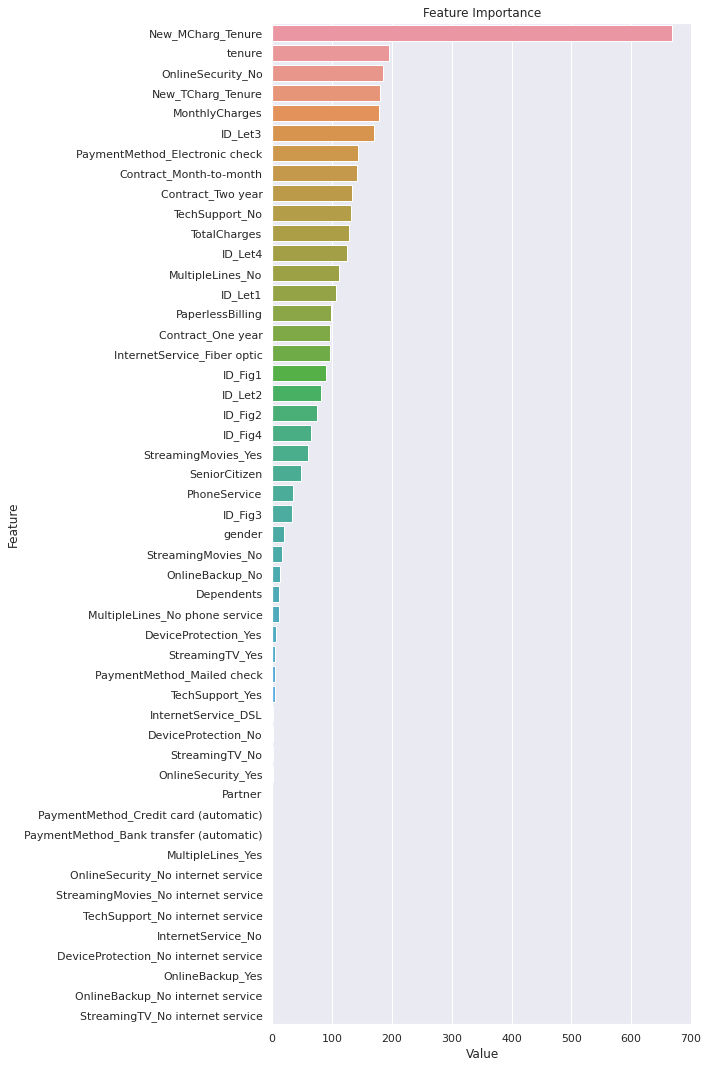

In [63]:
# Plot İmportance
plot_importance(lgbm_tuned , X_test)

## GBM Model

In [64]:
# GradientBoostingClassifier()
model= GradientBoostingClassifier().fit(X_train, y_train)
y_pred = model.predict(X_test)
test_score=accuracy_score(y_pred, y_test) 
y_pred_train=model.predict(X_train)
train_score=accuracy_score(y_pred_train, y_train)

print("Test Scor: ",test_score)
print("Train Score", train_score)
print("###########################")
print(confusion_matrix(y_pred, y_test))
print(classification_report(y_pred, y_test))

Test Scor:  0.8176011355571328
Train Score 0.8343982960596379
###########################
[[959 174]
 [ 83 193]]
              precision    recall  f1-score   support

           0       0.92      0.85      0.88      1133
           1       0.53      0.70      0.60       276

    accuracy                           0.82      1409
   macro avg       0.72      0.77      0.74      1409
weighted avg       0.84      0.82      0.83      1409



In [65]:
# Model Tuning

gbm_params = {"learning_rate": [0.005,0.01, 0.1],
              "max_depth": [3, 8],
              "n_estimators": [300,500,800, 1000],
              "subsample": [0.3, 0.5, 0.7, 1]}

gbm_model = GradientBoostingClassifier(random_state=17)
gbm_cv_model = GridSearchCV(gbm_model, gbm_params, cv=5, n_jobs=-1, verbose=2).fit(X_train, y_train)
gbm_cv_model.best_params_

Fitting 5 folds for each of 96 candidates, totalling 480 fits


{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.3}

In [66]:
# Final Model

gbm_tuned = GradientBoostingClassifier(**gbm_cv_model.best_params_).fit(X_train, y_train)
y_pred = gbm_tuned.predict(X_test)
test_score=accuracy_score(y_pred, y_test) 
y_pred_train=gbm_tuned.predict(X_train)
train_score=accuracy_score(y_pred_train, y_train)

print("Test Scor: ",test_score)
print("Train Score", train_score)
print("###########################")
print(confusion_matrix(y_pred, y_test))
print(classification_report(y_pred, y_test))

Test Scor:  0.8176011355571328
Train Score 0.8150514731984381
###########################
[[974 189]
 [ 68 178]]
              precision    recall  f1-score   support

           0       0.93      0.84      0.88      1163
           1       0.49      0.72      0.58       246

    accuracy                           0.82      1409
   macro avg       0.71      0.78      0.73      1409
weighted avg       0.86      0.82      0.83      1409



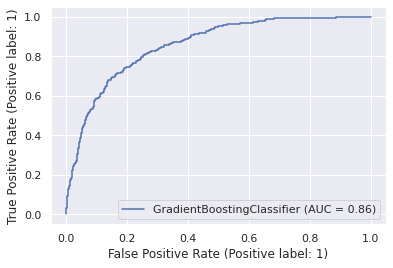

In [67]:
# Roc Curve
metrics.plot_roc_curve(gbm_tuned, X_test, y_test)  

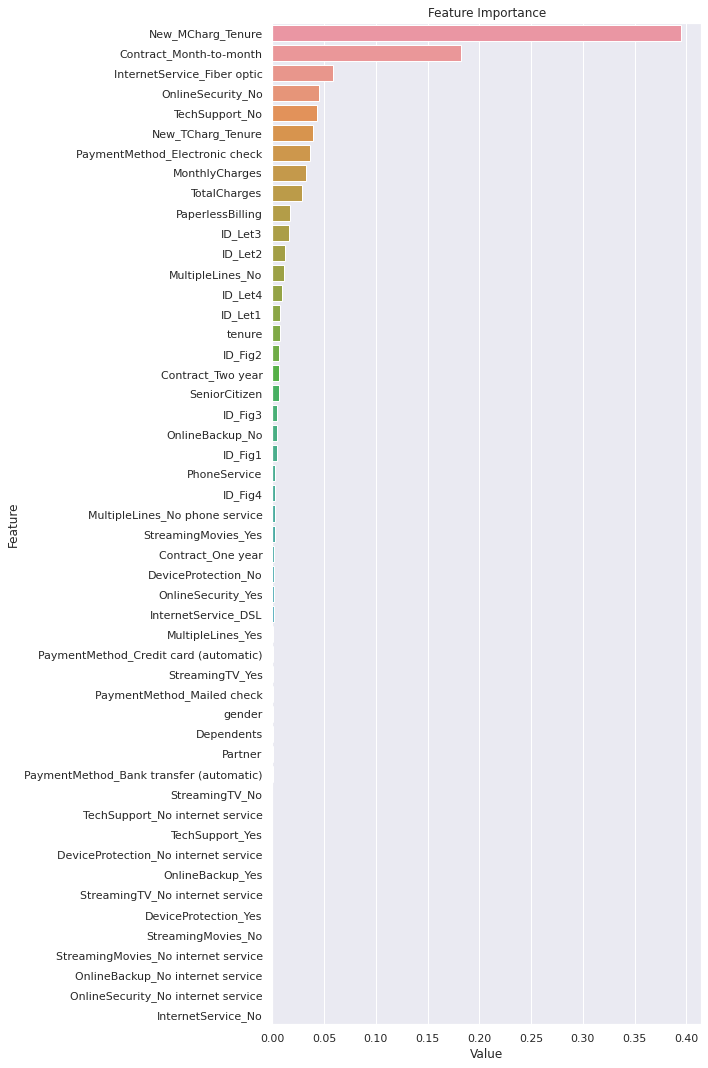

In [68]:
# Plot İmportance
plot_importance(gbm_tuned , X_test)

> # **Thank You**